In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("occupancy.csv")
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [3]:
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [4]:
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [10]:
X = df.drop(['date', 'Occupancy'], axis=1) # independent variables
y = df['Occupancy'] # dependent variable

In [11]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764
1,23.7180,26.290,578.400000,760.400000,0.004773
2,23.7300,26.230,572.666667,769.666667,0.004765
3,23.7225,26.125,493.750000,774.750000,0.004744
4,23.7540,26.200,488.600000,779.000000,0.004767


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Occupancy, dtype: int64

In [15]:
y.value_counts()

0    15810
1     4750
Name: Occupancy, dtype: int64

In [28]:
len(X), len(y)

(20560, 20560)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train) # model training

model.score(X_test, y_test) # model accuracy

0.9919747081712063

<AxesSubplot:>

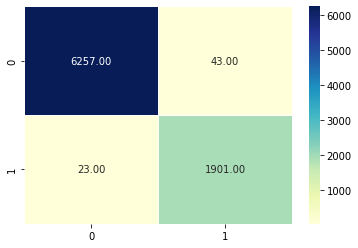

In [31]:
# making heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)
con_mat = confusion_matrix(y_true=y_test, y_pred=y_preds)

sns.heatmap(con_mat, annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')
# sns.heatmap(con_mat)


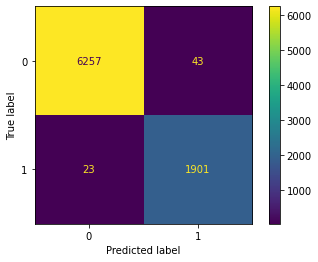

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)